In [102]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
mem = Memory("./mycache")

@mem.cache
def get_data():
    data = load_svmlight_file("D:/python/machine_learning/housing_scale")
    return data[0],data[1]
X,y=get_data()

In [103]:
w = np.zeros((14,))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [104]:
X_train.shape

(354, 13)

In [105]:
train_x_b = np.ones((X_train.shape[0],1))
test_x_b = np.ones((X_test.shape[0],1))
X_train = np.column_stack((X_train.toarray(),train_x_b))
X_test = np.column_stack((X_test.toarray(),test_x_b))

In [106]:
def loss_function(x,y,w):
    return (1/2)*np.dot((y-np.dot(x,w)).T,(y-np.dot(x,w)))*(1/x.shape[0])

In [107]:
def descent_function(x,y,w):
    return np.dot((x.T),(np.dot(x,w)-y))*(1/x.shape[0])

In [108]:
rate=0.01
loss_train=[]
loss_test=[]
for i in range(1000):
    descent=descent_function(X_train,y_train,w)
    w=w-rate*descent
    loss_train.append(loss_function(X_train,y_train,w))
    loss_test.append(loss_function(X_test,y_test,w))

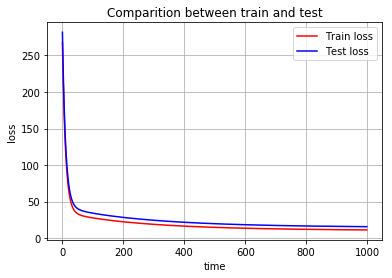

In [109]:
plt.title('Comparition between train and test')
plt.xlabel('time')
plt.ylabel('loss')
plt.plot(loss_train,label= "Train loss",color = 'red')
plt.plot(loss_test,label= "Test loss",color = 'blue')
plt.legend(loc='upper right')
plt.grid()
plt.show()